<a href="https://colab.research.google.com/github/Ganeshgani-25/projects/blob/main/classification_of_home_appliances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING HEADER FILES

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread,imshow
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm


IMPORTING IMAGES FOR TRAINING

In [64]:
category=['hair_dryer','iron_box','mixer_grinder','refrigerator']
path='/content/drive/MyDrive/minor'
img_flat=[]
target=[]
for folder in os.listdir(path):
  index=category.index(folder)
  patha=os.path.join(path,folder)
  for img in os.listdir(patha):
    image=imread(os.path.join(patha,img))
    img_resize=resize(image,output_shape=(50,50,3)) #resizing the image
    img_flat.append(img_resize.flatten()) #converting it to 1-D array
    target.append(index)
img_flat=np.array(img_flat)
target=np.array(target)

SPLITTING THE DATA INTO TRAINING AND TESTING

In [74]:
x_train,x_test,y_train,y_test=train_test_split(img_flat,target, test_size=0.3, random_state=16)

In [75]:
x_train.shape


(110, 7500)

CREATING THE MODEL

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(gamma='scale', probability=True)
parameter_grid = {'C':[1, 2, 3, 10, 100], 'kernel':['linear', 'rbf']}
classifier = GridSearchCV(estimator=model, param_grid=parameter_grid,scoring='accuracy',cv=5,n_jobs=-1)

FITTING THE MODEL

In [77]:
classifier.fit(x_train , y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 10, 100], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [78]:
print(y_train[1])
classifier.decision_function(x_train[0:2])

1


array([[ 3.2577539 ,  1.93655052, -0.2125518 ,  0.80466614],
       [-0.22894466,  3.25000186,  1.9285617 ,  0.88394647]])

In [79]:
best_parameters = classifier.best_params_
print("BEST_PARAMETERS:",best_parameters)

BEST_PARAMETERS: {'C': 2, 'kernel': 'rbf'}


In [80]:
best_result = classifier.best_score_
print("BEST_SCORE: ",best_result)

BEST_SCORE:  0.8545454545454547


FINDING AND PLOTTING CONFUSION MATRIX AND
FINDING THE ACCURACY

Text(50.09375, 0.5, 'True_Values')

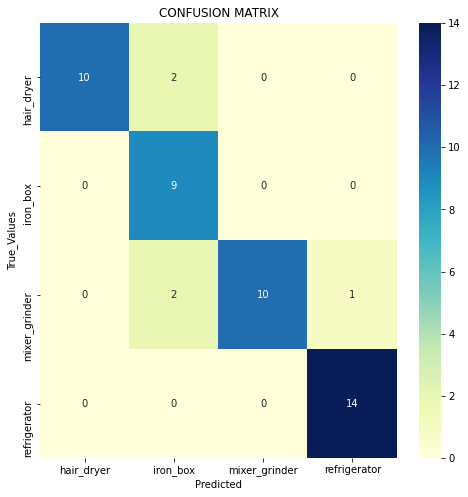

In [81]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sb.heatmap(cm, annot=True, cmap="YlGnBu",xticklabels=category, yticklabels=category)
plt.title("CONFUSION MATRIX")
plt.xlabel("Predicted")
plt.ylabel("True_Values")

In [82]:
print('Accuracy : ',accuracy_score(y_test,y_pred)*100)

Accuracy :  89.58333333333334


PREDICTION FOR NEW DATA

In [83]:
flat=[]
pred_path='/content/drive/MyDrive/minor/testing'
actual=[]
for y in os.listdir(pred_path):
  pathb=os.path.join(pred_path,y)
  image=imread(pathb)
  y_resize=resize(image,output_shape=(50,50,3))
  flat.append(y_resize.flatten())
  actual.append(y)


FINDING THE PROBABILITY


In [84]:
print(category)
pred=classifier.predict(flat)
print(classifier.decision_function(flat))

['hair_dryer', 'iron_box', 'mixer_grinder', 'refrigerator']
[[ 0.8547609   2.17322549  3.21945029 -0.23034932]
 [ 3.22643513  0.92873652  2.00704694 -0.21710441]
 [ 0.86842115  1.81694749 -0.19348515  3.25497165]
 [ 3.16314154 -0.16536263  2.04065338  0.96615699]
 [-0.17826681  3.15409743  2.06997365  1.00786735]
 [-0.17480262  3.18029911  2.03140387  0.94926492]
 [ 3.2453873   1.90234961  0.84666633 -0.2012688 ]
 [-0.23511824  3.25678801  2.02543018  0.82979361]
 [-0.11823202  3.19724727  1.89481097  0.8983558 ]
 [ 0.84097966  3.23371892  1.96650498 -0.18979479]
 [-0.20279348  2.12418361  3.22439469  0.8253906 ]
 [ 2.04576149  3.16553182  0.94594102 -0.16257138]
 [ 3.16388206 -0.14927279  2.10282561  0.8747115 ]
 [ 2.15363219  3.14951272  1.05069806 -0.21627858]
 [-0.20717862  2.17792201  3.19372118  0.84301911]
 [-0.20080838  1.86022813  3.24528998  0.88190675]
 [-0.24265698  0.85958064  3.26345418  1.91065672]
 [-0.20360772  0.8740112   3.2218713   2.05241899]
 [ 2.08079926  0.83677

In [86]:
df=pd.DataFrame({'Actual_item':actual,'Predicted_item':pred})
df['Predicted_item'].replace({0:'hair_dryer',1:'iron_box',2:'mixer_grinder',3:'refrigerator'},inplace=True)
df

,Actual_item,Predicted_item
0,sib3.jpeg,mixer_grinder
1,bhd1.jpeg,hair_dryer
2,f3.jpeg,refrigerator
3,bhd4.jpeg,hair_dryer
4,f4.jpeg,iron_box
5,sib2.jpeg,iron_box
6,bhd5.jpeg,hair_dryer
7,sib1.jpeg,iron_box
8,f5.jpeg,iron_box
9,sib.jpeg,iron_box
